In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

In [6]:
# Merge datasets to combine customer profile and transaction data
merged_data = transactions.merge(customers, on='CustomerID')

# Aggregate transaction and profile data for clustering
customer_segmentation_data = merged_data.groupby('CustomerID').agg({
    'TotalValue': 'sum',
    'Quantity': 'sum',
    'Region': lambda x: x.mode()[0]  # Most frequent region
}).reset_index()
customer_segmentation_data.head()

,CustomerID,TotalValue,Quantity,Region
0,C0001,3354.52,12,South America
1,C0002,1862.74,10,Asia
2,C0003,2725.38,14,South America
3,C0004,5354.88,23,South America
4,C0005,2034.24,7,Asia


In [7]:
# Encode the 'Region' column
customer_segmentation_data = pd.get_dummies(customer_segmentation_data, columns=['Region'], drop_first=True)

# Normalize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_segmentation_data.drop(columns=['CustomerID']))

# Determine the optimal number of clusters using the Davies-Bouldin Index
db_index_values = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(scaled_data)
    db_index = davies_bouldin_score(scaled_data, clusters)
    db_index_values.append(db_index)


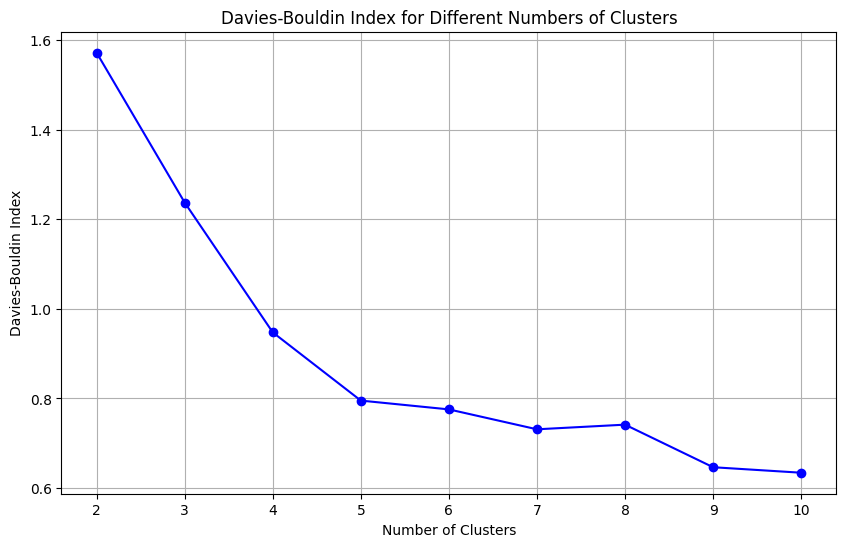

In [8]:
# Plot DB Index values for different numbers of clusters
plt.figure(figsize=(10, 6))
plt.plot(cluster_range, db_index_values, marker='o', linestyle='-', color='b')
plt.title('Davies-Bouldin Index for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Davies-Bouldin Index')
plt.xticks(cluster_range)
plt.grid(True)
plt.show()

In [9]:
# Choose the optimal number of clusters (e.g., with the lowest DB Index)
optimal_clusters = cluster_range[db_index_values.index(min(db_index_values))]
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_segmentation_data['Cluster'] = kmeans.fit_predict(scaled_data)

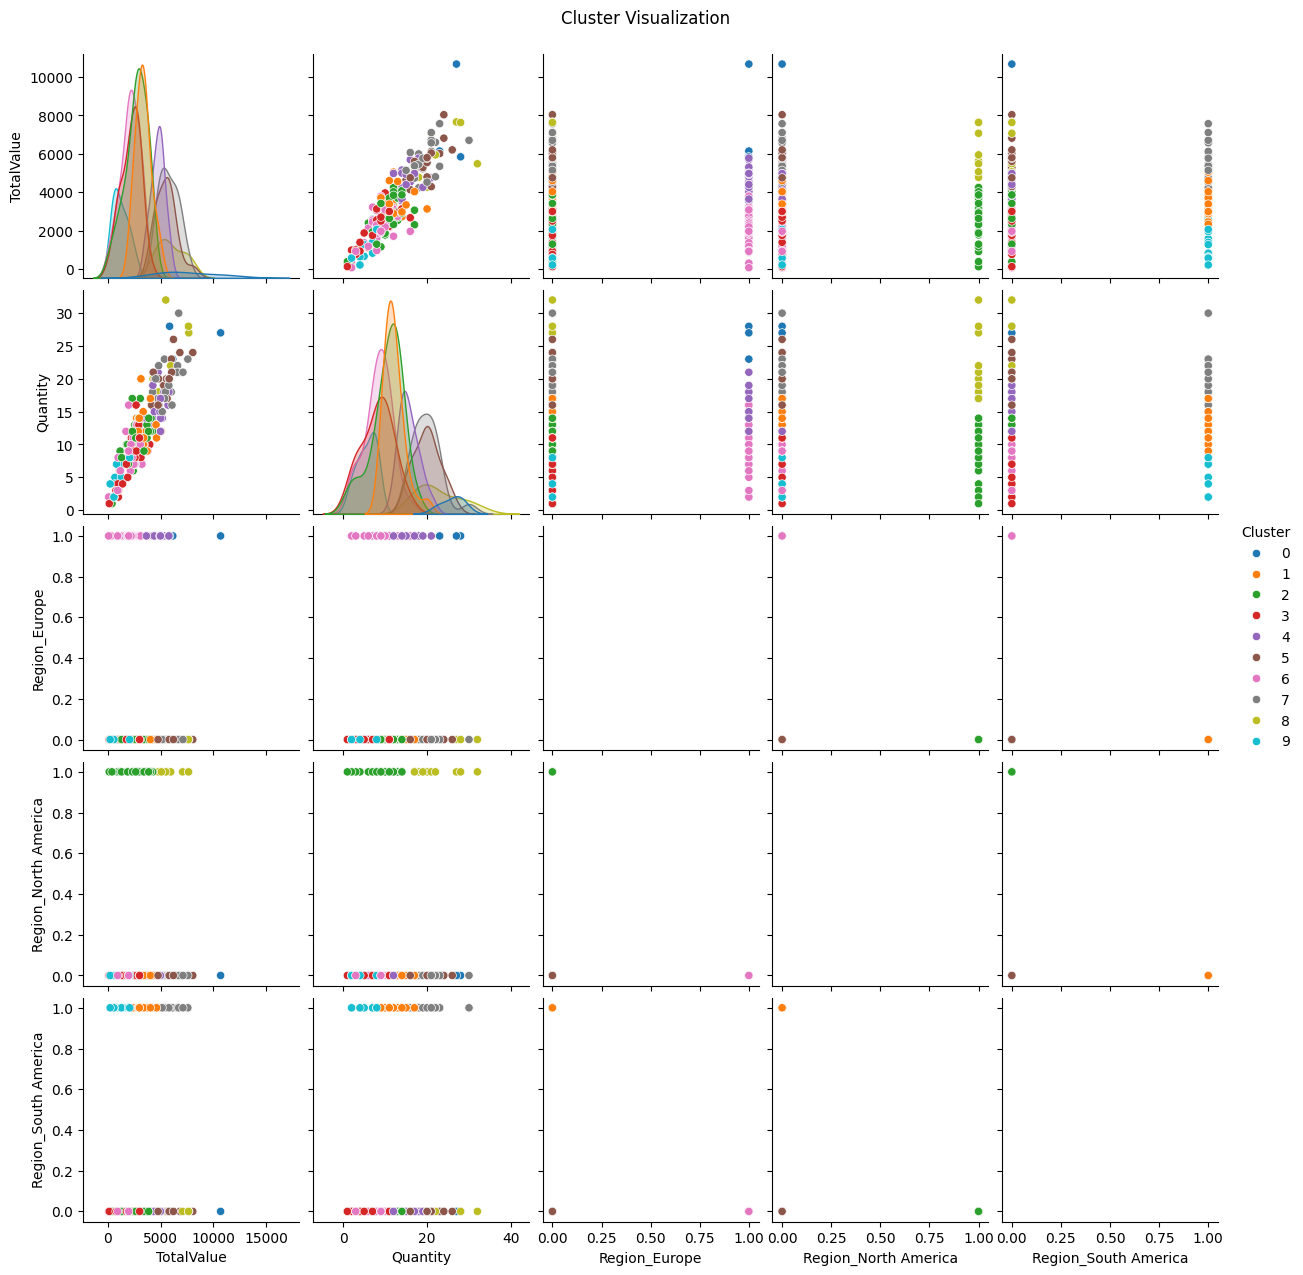

In [10]:
# Visualize the clusters using relevant plots
sns.pairplot(customer_segmentation_data, hue='Cluster', diag_kind='kde', palette='tab10')
plt.suptitle('Cluster Visualization', y=1.02)
plt.show()

In [13]:
# Calculate final DB Index
final_db_index = davies_bouldin_score(scaled_data, customer_segmentation_data['Cluster'])

print(f"Clustering completed with {optimal_clusters} clusters.")
print(f"Final Davies-Bouldin Index: {final_db_index:.4f}")

Clustering completed with 10 clusters.
Final Davies-Bouldin Index: 0.6340
